# Feature Transformation and TS-Fresh

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

When we work with differents features sometimes we need do a transformation to a specific features.

In [1]:
import warnings
warnings.filterwarnings("ignore")

# 1. Polynomial

In [2]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df = pd.DataFrame({'var_X': [i for i in range(1, 10 + 1)]})

In [4]:
df

,var_X
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [5]:
poly = PolynomialFeatures(3)

In [6]:
df_poly = pd.DataFrame(poly.fit_transform(df[['var_X']]))

In [7]:
df_poly.columns = list(poly.get_feature_names_out())

In [8]:
df_poly

,1,var_X,var_X^2,var_X^3
0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0
2,1.0,3.0,9.0,27.0
3,1.0,4.0,16.0,64.0
4,1.0,5.0,25.0,125.0
5,1.0,6.0,36.0,216.0
6,1.0,7.0,49.0,343.0
7,1.0,8.0,64.0,512.0
8,1.0,9.0,81.0,729.0
9,1.0,10.0,100.0,1000.0


# 2. Standarize

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaler = scaler.fit(df_poly[['var_X', 'var_X^2']])

In [12]:
scaler.mean_

array([ 5.5, 38.5])

In [13]:
scaler.var_

array([   8.25, 1051.05])

**Comments:** The variance of the Standard Scaler is calculated dividing by $n$ instead of $ (n - 1) $.

In [14]:
df_poly[['std_var_X', 'std_var_X^2']] = scaler.transform(df_poly[['var_X', 'var_X^2']])

In [15]:
df_poly[['std_var_X', 'std_var_X^2']].mean()

std_var_X     -6.661338e-17
std_var_X^2   -4.440892e-17
dtype: float64

In [16]:
df_poly[['std_var_X', 'std_var_X^2']].std()

std_var_X      1.054093
std_var_X^2    1.054093
dtype: float64

**Comments:** You can see the standar deviation is not exactly 1.0 for the reason we comment previosly.

# 3. TS Fresh

In [17]:
from tsfresh import extract_features

TS Fresh is a library which allows us extract different features of a time series as Fast Fourier Transform (FFT) among others.

In [18]:
vars = ['X', 'U']

dict_vars = {'X': 1, 'U': 2}

In [19]:
dict_df = {}
dict_df['code_id'] = ['1117', '1019']

for v in vars:
    
    for i in range(1, 10 + 1):

        dict_df[v + '_' + str(i)] = [dict_vars[v]*i, dict_vars[v]*i + 1]

In [20]:
df = pd.DataFrame(dict_df)
df.index = [7, 21]

In [21]:
df

,code_id,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,U_1,U_2,U_3,U_4,U_5,U_6,U_7,U_8,U_9,U_10
7,1117,1,2,3,4,5,6,7,8,9,...,2,4,6,8,10,12,14,16,18,20
21,1019,2,3,4,5,6,7,8,9,10,...,3,5,7,9,11,13,15,17,19,21


In [22]:
var_X = [f'X_{i}' for i in range(1, 10 + 1)]
var_U = [f'U_{i}' for i in range(1, 10 + 1)]

In [23]:
var_X

['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10']

In [24]:
var_U

['U_1', 'U_2', 'U_3', 'U_4', 'U_5', 'U_6', 'U_7', 'U_8', 'U_9', 'U_10']

In [25]:
df = df.reset_index()
df = df.drop(columns = ['index'])

In [26]:
df

,code_id,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,U_1,U_2,U_3,U_4,U_5,U_6,U_7,U_8,U_9,U_10
0,1117,1,2,3,4,5,6,7,8,9,...,2,4,6,8,10,12,14,16,18,20
1,1019,2,3,4,5,6,7,8,9,10,...,3,5,7,9,11,13,15,17,19,21


### var_X 

In [27]:
df_X = df[['code_id'] + var_X]

In [28]:
df_X

,code_id,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10
0,1117,1,2,3,4,5,6,7,8,9,10
1,1019,2,3,4,5,6,7,8,9,10,11


In [29]:
change_dict = {}

for t in range(10):
    change_dict[var_X[t]] = t + 1

In [30]:
change_dict

{'X_1': 1,
 'X_2': 2,
 'X_3': 3,
 'X_4': 4,
 'X_5': 5,
 'X_6': 6,
 'X_7': 7,
 'X_8': 8,
 'X_9': 9,
 'X_10': 10}

In [31]:
df_ts_fresh = df[var_X].copy()

In [32]:
df_ts_fresh

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10
0,1,2,3,4,5,6,7,8,9,10
1,2,3,4,5,6,7,8,9,10,11


In [33]:
df_ts_fresh = df_ts_fresh.rename(columns = change_dict)

In [34]:
df_ts_fresh

,1,2,3,4,5,6,7,8,9,10
0,1,2,3,4,5,6,7,8,9,10
1,2,3,4,5,6,7,8,9,10,11


In [35]:
df_ts_fresh = df_ts_fresh.transpose()

In [36]:
df_ts_fresh

,0,1
1,1,2
2,2,3
3,3,4
4,4,5
5,5,6
6,6,7
7,7,8
8,8,9
9,9,10
10,10,11


In [37]:
cols_df = list(df_ts_fresh.columns)

In [38]:
cols_df

[0, 1]

In [39]:
df_ts_fresh = df_ts_fresh.reset_index()

In [40]:
df_ts_fresh = df_ts_fresh.rename(columns = {'index': 'time'})

In [41]:
df_ts_fresh

,time,0,1
0,1,1,2
1,2,2,3
2,3,3,4
3,4,4,5
4,5,5,6
5,6,6,7
6,7,7,8
7,8,8,9
8,9,9,10
9,10,10,11


In [42]:
df_ts_new = []

for c in cols_df:
    
    df_ts_new_part = pd.DataFrame()
    df_ts_new_part['time'] = df_ts_fresh['time']
    df_ts_new_part['values'] = df_ts_fresh[c].apply(float)
    df_ts_new_part['id'] = c

    df_ts_new.append(df_ts_new_part)

In [43]:
df_ts_new = pd.concat(df_ts_new, axis = 0)
df_ts_new = df_ts_new.reset_index()
df_ts_new = df_ts_new.drop(columns = ['index'])

In [44]:
df_ts_new

,time,values,id
0,1,1.0,0
1,2,2.0,0
2,3,3.0,0
3,4,4.0,0
4,5,5.0,0
5,6,6.0,0
6,7,7.0,0
7,8,8.0,0
8,9,9.0,0
9,10,10.0,0


In [45]:
df_ts_new = df_ts_new.rename(columns = {'values': 'var_X'})

In [46]:
df_ts_new

,time,var_X,id
0,1,1.0,0
1,2,2.0,0
2,3,3.0,0
3,4,4.0,0
4,5,5.0,0
5,6,6.0,0
6,7,7.0,0
7,8,8.0,0
8,9,9.0,0
9,10,10.0,0


### a. Extract all the features

In [47]:
ts_fresh_fea = extract_features(df_ts_new, column_id = 'id', column_sort = 'time', disable_progressbar = True)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [48]:
ts_fresh_fea

,var_X__variance_larger_than_standard_deviation,var_X__has_duplicate_max,var_X__has_duplicate_min,var_X__has_duplicate,var_X__sum_values,var_X__abs_energy,var_X__mean_abs_change,var_X__mean_change,var_X__mean_second_derivative_central,var_X__median,...,var_X__fourier_entropy__bins_5,var_X__fourier_entropy__bins_10,var_X__fourier_entropy__bins_100,var_X__permutation_entropy__dimension_3__tau_1,var_X__permutation_entropy__dimension_4__tau_1,var_X__permutation_entropy__dimension_5__tau_1,var_X__permutation_entropy__dimension_6__tau_1,var_X__permutation_entropy__dimension_7__tau_1,var_X__query_similarity_count__query_None__threshold_0.0,var_X__mean_n_absolute_max__number_of_maxima_7
0,1.0,0.0,0.0,0.0,55.0,385.0,1.0,1.0,0.0,5.5,...,0.450561,0.450561,1.242453,-0.0,-0.0,-0.0,-0.0,-0.0,NaN,7.0
1,1.0,0.0,0.0,0.0,65.0,505.0,1.0,1.0,0.0,6.5,...,0.450561,0.450561,1.242453,-0.0,-0.0,-0.0,-0.0,-0.0,NaN,8.0


In [49]:
ts_fresh_fea = ts_fresh_fea.reset_index()

In [50]:
ts_fresh_fea

,index,var_X__variance_larger_than_standard_deviation,var_X__has_duplicate_max,var_X__has_duplicate_min,var_X__has_duplicate,var_X__sum_values,var_X__abs_energy,var_X__mean_abs_change,var_X__mean_change,var_X__mean_second_derivative_central,...,var_X__fourier_entropy__bins_5,var_X__fourier_entropy__bins_10,var_X__fourier_entropy__bins_100,var_X__permutation_entropy__dimension_3__tau_1,var_X__permutation_entropy__dimension_4__tau_1,var_X__permutation_entropy__dimension_5__tau_1,var_X__permutation_entropy__dimension_6__tau_1,var_X__permutation_entropy__dimension_7__tau_1,var_X__query_similarity_count__query_None__threshold_0.0,var_X__mean_n_absolute_max__number_of_maxima_7
0,0,1.0,0.0,0.0,0.0,55.0,385.0,1.0,1.0,0.0,...,0.450561,0.450561,1.242453,-0.0,-0.0,-0.0,-0.0,-0.0,NaN,7.0
1,1,1.0,0.0,0.0,0.0,65.0,505.0,1.0,1.0,0.0,...,0.450561,0.450561,1.242453,-0.0,-0.0,-0.0,-0.0,-0.0,NaN,8.0


In [51]:
df

,code_id,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,U_1,U_2,U_3,U_4,U_5,U_6,U_7,U_8,U_9,U_10
0,1117,1,2,3,4,5,6,7,8,9,...,2,4,6,8,10,12,14,16,18,20
1,1019,2,3,4,5,6,7,8,9,10,...,3,5,7,9,11,13,15,17,19,21


In [52]:
df = df.reset_index()

In [53]:
df

,index,code_id,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,U_1,U_2,U_3,U_4,U_5,U_6,U_7,U_8,U_9,U_10
0,0,1117,1,2,3,4,5,6,7,8,...,2,4,6,8,10,12,14,16,18,20
1,1,1019,2,3,4,5,6,7,8,9,...,3,5,7,9,11,13,15,17,19,21


In [54]:
df_ts_X_all = df.merge(ts_fresh_fea, on = ['index'], how = 'left')

In [55]:
df_ts_X_all

,index,code_id,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,var_X__fourier_entropy__bins_5,var_X__fourier_entropy__bins_10,var_X__fourier_entropy__bins_100,var_X__permutation_entropy__dimension_3__tau_1,var_X__permutation_entropy__dimension_4__tau_1,var_X__permutation_entropy__dimension_5__tau_1,var_X__permutation_entropy__dimension_6__tau_1,var_X__permutation_entropy__dimension_7__tau_1,var_X__query_similarity_count__query_None__threshold_0.0,var_X__mean_n_absolute_max__number_of_maxima_7
0,0,1117,1,2,3,4,5,6,7,8,...,0.450561,0.450561,1.242453,-0.0,-0.0,-0.0,-0.0,-0.0,NaN,7.0
1,1,1019,2,3,4,5,6,7,8,9,...,0.450561,0.450561,1.242453,-0.0,-0.0,-0.0,-0.0,-0.0,NaN,8.0


In [56]:
df_ts_X_all = df_ts_X_all.drop(columns = ['index'])

In [57]:
df_ts_X_all

,code_id,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,var_X__fourier_entropy__bins_5,var_X__fourier_entropy__bins_10,var_X__fourier_entropy__bins_100,var_X__permutation_entropy__dimension_3__tau_1,var_X__permutation_entropy__dimension_4__tau_1,var_X__permutation_entropy__dimension_5__tau_1,var_X__permutation_entropy__dimension_6__tau_1,var_X__permutation_entropy__dimension_7__tau_1,var_X__query_similarity_count__query_None__threshold_0.0,var_X__mean_n_absolute_max__number_of_maxima_7
0,1117,1,2,3,4,5,6,7,8,9,...,0.450561,0.450561,1.242453,-0.0,-0.0,-0.0,-0.0,-0.0,NaN,7.0
1,1019,2,3,4,5,6,7,8,9,10,...,0.450561,0.450561,1.242453,-0.0,-0.0,-0.0,-0.0,-0.0,NaN,8.0


### b. Select particular features

In [58]:
dict_select_X = {'var_X': {'permutation_entropy': [{'dimension': 3, 'tau': 1}], 'sum_values': []}}

In [59]:
ts_fresh_fea = extract_features(df_ts_new, column_id = 'id', column_sort = 'time', kind_to_fc_parameters = dict_select_X, disable_progressbar = True)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [60]:
ts_fresh_fea

,var_X__permutation_entropy__dimension_3__tau_1,var_X__sum_values
0,-0.0,55.0
1,-0.0,65.0


In [61]:
ts_fresh_fea = ts_fresh_fea.reset_index()

In [62]:
ts_fresh_fea

,index,var_X__permutation_entropy__dimension_3__tau_1,var_X__sum_values
0,0,-0.0,55.0
1,1,-0.0,65.0


In [63]:
df

,index,code_id,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,U_1,U_2,U_3,U_4,U_5,U_6,U_7,U_8,U_9,U_10
0,0,1117,1,2,3,4,5,6,7,8,...,2,4,6,8,10,12,14,16,18,20
1,1,1019,2,3,4,5,6,7,8,9,...,3,5,7,9,11,13,15,17,19,21


In [64]:
df_ts_X_part = df.merge(ts_fresh_fea, on = ['index'], how = 'left')

In [65]:
df_ts_X_part

,index,code_id,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,U_3,U_4,U_5,U_6,U_7,U_8,U_9,U_10,var_X__permutation_entropy__dimension_3__tau_1,var_X__sum_values
0,0,1117,1,2,3,4,5,6,7,8,...,6,8,10,12,14,16,18,20,-0.0,55.0
1,1,1019,2,3,4,5,6,7,8,9,...,7,9,11,13,15,17,19,21,-0.0,65.0


In [66]:
df_ts_X_part = df_ts_X_part.drop(columns = ['index'])

In [67]:
df_ts_X_part

,code_id,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,U_3,U_4,U_5,U_6,U_7,U_8,U_9,U_10,var_X__permutation_entropy__dimension_3__tau_1,var_X__sum_values
0,1117,1,2,3,4,5,6,7,8,9,...,6,8,10,12,14,16,18,20,-0.0,55.0
1,1019,2,3,4,5,6,7,8,9,10,...,7,9,11,13,15,17,19,21,-0.0,65.0


# 4. Log transform

In [68]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

In [69]:
def log_transform(x):

    return np.log(x)

In [70]:
transformer = FunctionTransformer(log_transform)

In [71]:
df = pd.DataFrame()

df['X'] = [i**2 for i in range(1, 100 + 1)]
df['y'] = [i for i in range(1, 100 + 1)]

In [72]:
df

,X,y
0,1,1
1,4,2
2,9,3
3,16,4
4,25,5
...,...,...
95,9216,96
96,9409,97
97,9604,98
98,9801,99


### a. Feature

In [73]:
df['log_X'] = transformer.transform(df['X'])

In [74]:
df

,X,y,log_X
0,1,1,0.000000
1,4,2,1.386294
2,9,3,2.197225
3,16,4,2.772589
4,25,5,3.218876
...,...,...,...
95,9216,96,9.128696
96,9409,97,9.149422
97,9604,98,9.169935
98,9801,99,9.190240


### b. Target

The log-transformation is used when the target have right-skewed distributions

In [75]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt

In [76]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

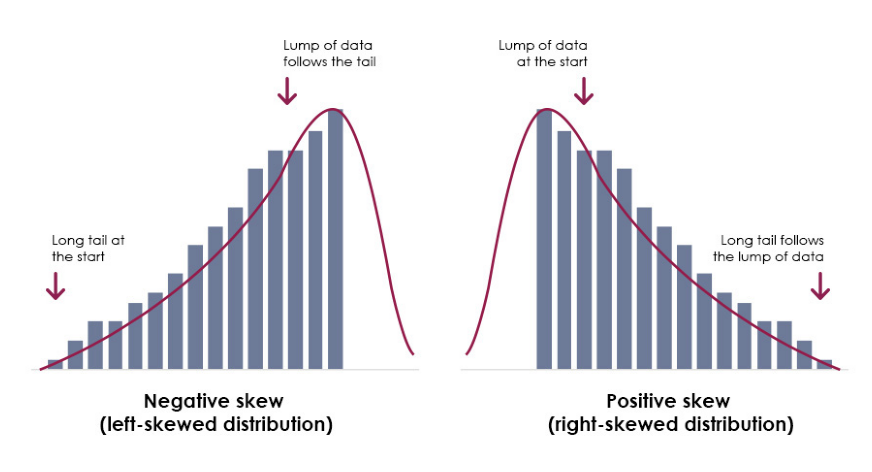

In [77]:
display_img('figure_1.jpeg', 11, 10)

In [78]:
df['log_y'] = transformer.transform(df['y'])

### c. Relation after Log-transformation for Linear Regressions

**i. Only the target with Log-transformation**

$ log(Y_i) = \beta_1 \cdot X_i $

$ \Rightarrow $

$ Y_i = e^{\beta_1} \cdot e^{X_i} $

$ Y_i = \beta_2 \cdot e^{X_i} $

**ii. Target and Feature with Log-transformation**

$ log(Y_i) = \beta_1 \cdot log(X_i) $

$ \Rightarrow $

$ Y_i = {X_i}^{\beta_1} $

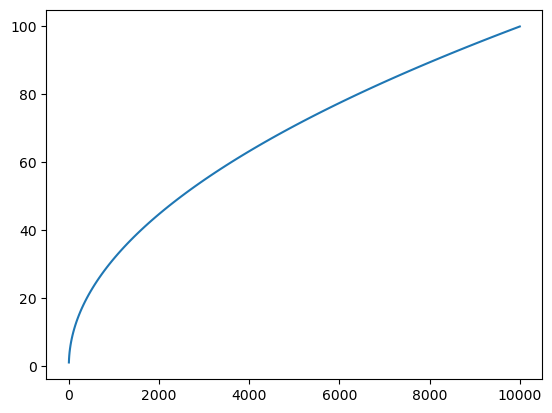

In [79]:
plt.plot(df['X'], df['y'])
plt.show()

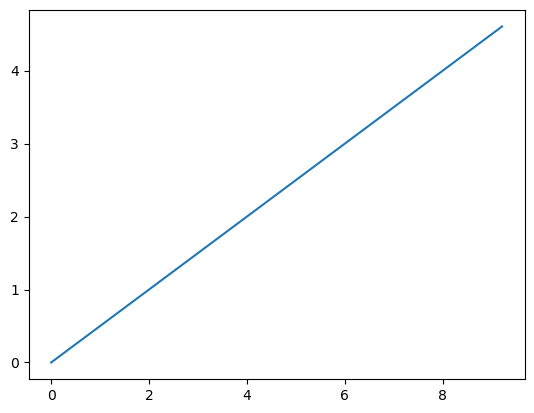

In [80]:
plt.plot(df['log_X'], df['log_y'])
plt.show()